Homework 4a


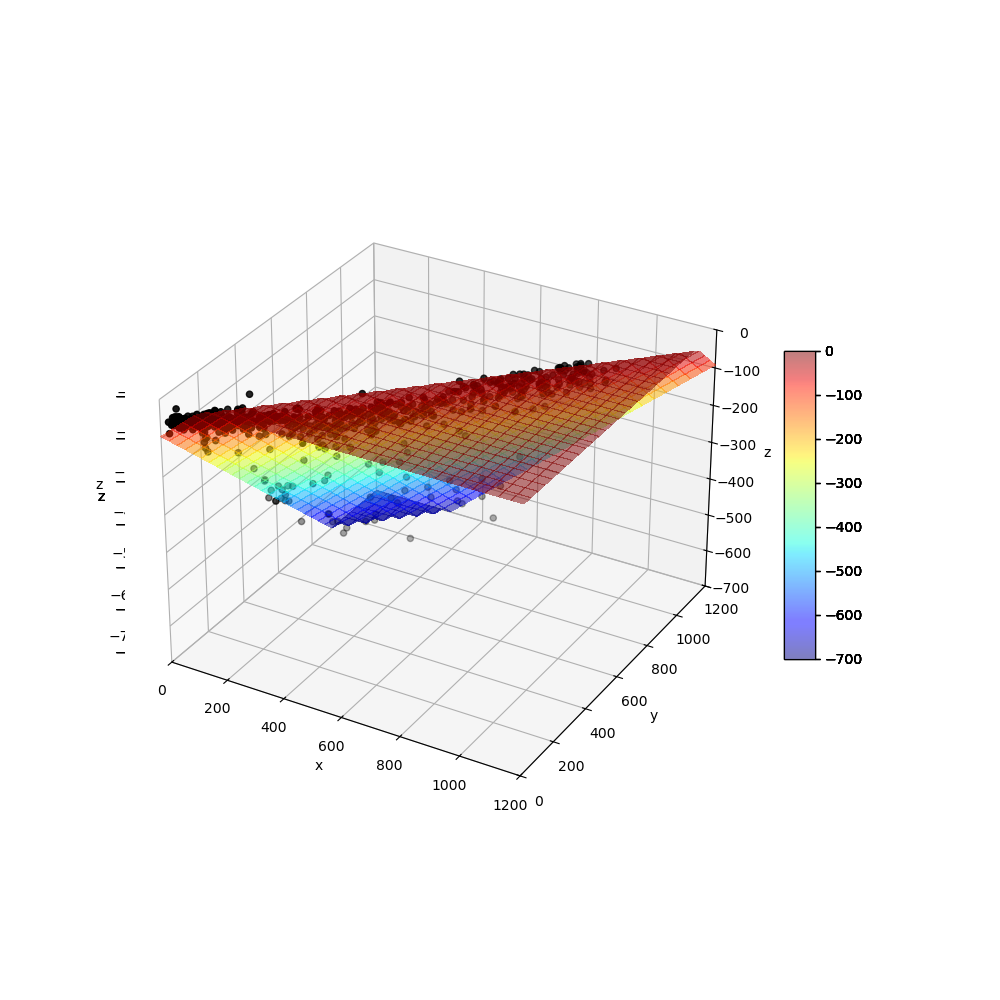

In [7]:
# Homework 4a
#
# planar fit to depths of earthquakes in the Kurile subduction zone
%matplotlib widget

from math import pi
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt  # general plotting 
from matplotlib import cm 

print("Homework 4a")

# read data and convert to km
D = np.genfromtxt("../HW4_data/kurile_eqs.txt", delimiter="\t")
N, K = np.shape(D)
lat=D[0:N,0:1]
lon=D[0:N,1:2]
depth=D[0:N,2:3]

x = 111.12*np.cos((pi/180)*np.mean(lat))*(lon-np.min(lon))
y = 111.12*(lat-np.min(lat))
z = depth

d_obs=(-depth)

# set bounds and 3D plot of data
fig1 = plt.figure(1, figsize=(10, 10))
xmin = 0.0
xmax = 1200.0
ymin = 0.0
ymax = 1200.0
zmin = -700.0
zmax = 0.0

ax1 = fig1.add_subplot(111, projection='3d')
ax1.axes.set_xlim3d(left=xmin, right=xmax)
ax1.axes.set_ylim3d(bottom=ymin, top=ymax)
ax1.axes.set_zlim3d(bottom=zmin, top=zmax)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

# solve inverse problem of fitting a plane to data
M=3
G = np.zeros((N,M))
G[0:N,0:1] = np.ones((N,1))

G[0:N,1:2] = x
G[0:N,2:3] = y

# solve inverse problem

m_est = np.linalg.inv(G.T @ G) @ G.T @ d_obs
# m_est = la.pinv(G) @ d_obs

# predict data
d_pred=np.matmul(G,m_est)

# display fit as mesh in 3D space
K=31
xx = np.linspace(xmin, xmax, K).reshape((K, 1))
yy = np.linspace(ymin, ymax, K).reshape((K, 1))
X,Y=np.meshgrid(xx, yy)
Z = m_est[0,0]+m_est[1,0]*X+m_est[2,0]*Y

Z = np.clip(Z, zmin, zmax)

surf = ax1.plot_surface(X, Y, Z, cmap=cm.jet, lw=0, antialiased=False, alpha=0.5)  # Set alpha to 0.5 for transparency
ax1.scatter( xs=x, ys=y, zs=d_obs, color=(0,0,0) )
# ax1.view_init(1.0, 45.0)

# add colorbar
fig1.colorbar(surf, shrink=0.4, aspect=10)
plt.show()

# # plot observed and preddicted depths
# fig2 = plt.figure(2,figsize=(7,7))
# plt.axis( [-750.0, 0.0, -750.0, 0.0 ])
# plt.xlabel("observed depth (km)")
# plt.ylabel("predicted depth (km)")
# plt.plot(d_obs,d_pred,"ko",lw=2)
# plt.plot(np.linspace(-750.0, 0.0, 100), np.linspace(-750.0, 0.0, 100), "r-", lw=1)

# plt.show()